# Table of Contents

> **Note:** If you are viewing this notebook on GitHub, the links in the Table of Contents will not work.

---

[Dependences](#Dependences)
| [Basic usage](#Basic-usage)
| [Using preamble](#Using-preamble)
| [Loading packages and libraries](#Loading-packages-and-libraries)
| [Scaling the output](#Scaling-the-output)
| [Rasterize the image](#Rasterize-the-image)
| [Save](#Save)
| [Using IPython strings](#Using-IPython-strings)
| [Jinja templates](#Jinja-templates)
| [TeX Program](#TeX-Program)
| [Logging and debugging](#Logging-and-debugging)
| [Usage as a Package](#Usage-as-a-Package)
| [Additional Examples](#Additional-Examples)

---

# Dependences

## LaTeX

LaTeX must be installed using one of the following distributions:

- [TeX Live](https://tug.org/texlive/) (All Platforms)
- [MikTeX](https://miktex.org/) (Windows)
- [MacTeX](https://www.tug.org/mactex/) (Mac)

## Poppler

This application requires Poppler’s `pdftocairo`. You must install it beforehand.

### Conda - Platform Independent

```shell
conda install -c conda-forge poppler
```

### Windows

Download Poppler for Windows [here](https://github.com/oschwartz10612/poppler-windows/releases/). You must add the `bin` folder to your [PATH](https://www.c-sharpcorner.com/article/how-to-addedit-path-environment-variable-in-windows-11/).

### Linux

Most distributions come with `pdftocairo`. If it is not installed, refer to your package manager and

### Mac

Install using `brew`:

```shell
brew install poppler
```

To check if `pdftocairo` is installed on your system, you can use the following command:

In [1]:
!pdftocairo -v

pdftocairo version 24.04.0
Copyright 2005-2024 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC


Alternatively, if you are facing issues, you can configure the `pdftocairo` location (for use in `jupyter_tikz`) by setting the environment variable `JUPYTER_TIKZ_PDFTOCAIROPATH`:

```python
import os
custom_pdftocairo_path = os.path.join(
        os.getenv("LOCALAPPDATA"), "Poppler", "Library", "bin", "pdftocairo.exe"
    )
os.environ["JUPYTER_TIKZ_PDFTOCAIROPATH"] = custom_pdftocairo_path
```

## Jinja2 (Optional)

Jinja2 is necessary only if you plan to use [Jinja2 templates](https://jinja.palletsprojects.com/en/latest/templates/). To install it, use:

```shell
pip install jinja2
```

# Usage as IPython Magics

## Basic usage

Install it if it has not been installed yet:

```
pip install jupyter_tikz
```

Load `jupyter_tikz`. It is a IPython Magics extension:

In [2]:
%load_ext jupyter_tikz

Show help by typing `%tikz?`:

In [3]:
%tikz?

Docstring:
::

  %tikz [-as INPUT_TYPE] [-i] [-f] [-p LATEX_PREAMBLE] [-t TEX_PACKAGES]
            [-nt] [-l TIKZ_LIBRARIES] [-lp PGFPLOTS_LIBRARIES] [-j] [-pj]
            [-pt] [-sc SCALE] [-r] [-d DPI] [-g] [-e] [-k] [-tp TEX_PROGRAM]
            [-ta TEX_ARGS] [-nc] [-s SAVE_TIKZ] [-st SAVE_TEX] [-sp SAVE_PDF]
            [-S SAVE_IMAGE] [-sv SAVE_VAR] [--as-jinja]
            [code]

Renders a TikZ diagram in a Jupyter notebook cell. This function can be used as both a line magic (%tikz) and a cell magic (%%tikz).

When used as cell magic, it executes the TeX/TikZ code within the cell:
    Example:
        In [3]: %%tikz
           ...:  \begin{tikzpicture}
           ...:     \draw (0,0) rectangle (1,1);
           ...: \end{tikzpicture}

When used as line magic, the TeX/TikZ code is passed as an IPython string variable:
    Example:
        In [4]: %tikz "$ipython_string_variable_with_code"

Additional options can be passed to the magic command to customize LaTeX code and rende

Create a simple `tikzpicture`:

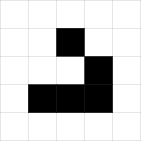

In [4]:
%%tikz
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black] (1, 1) rectangle (2, 2);
    \draw[fill=black] (2, 1) rectangle (3, 2);
    \draw[fill=black] (3, 1) rectangle (4, 2);
    \draw[fill=black] (3, 2) rectangle (4, 3);
    \draw[fill=black] (2, 3) rectangle (3, 4);
\end{tikzpicture}

Alternatively, you can generate TikZ pictures with different input formats by passing the `-as=<input_type>` (or `--input-type=<input_type>`) option. The available options are:

- `full-document`: Uses a full LaTeX document as input.
- `standalone-document`: Uses a standalone LaTeX document (with `\documentclass{standalone}`) and takes the content inside `\begin{document} ... \end{document}` as input.
- `tikzpicture`: Uses a standalone LaTeX document with the `tikzpicture` environment. It takes the content inside `\begin{tikzpicture} ... \end{tikzpicture}`.

If you don't specify the option, it uses the default: `-as=standalone-document`.

The code below shows an example using `-as=full-document` (the `full-document` input type):

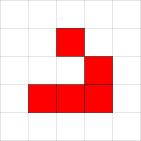

In [5]:
%%tikz -as=full-document
\documentclass[tikz]{standalone}
\begin{document}
    \begin{tikzpicture}
        \draw[help lines] grid (5, 5);
        \draw[fill=red] (1, 1) rectangle (2, 2);
        \draw[fill=red] (2, 1) rectangle (3, 2);
        \draw[fill=red] (3, 1) rectangle (4, 2);
        \draw[fill=red] (3, 2) rectangle (4, 3);
        \draw[fill=red] (2, 3) rectangle (3, 4);
    \end{tikzpicture}
\end{document}

Here is another example that uses `-as=tikzpicture`:

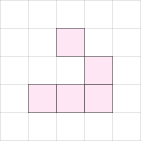

In [6]:
%%tikz -as=tikzpicture
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

> **Note:** `-as=<input_type>` matches the initial substring of the input type. This means that both `-as=full` and `-as=f` are valid for setting the `full-document` input type. The same rule applies to other types: for example, `-as=s` and `-as=standalone` for `standalone-document`, or `-as=tikz` and `-as=t` for `tikzpicture`. Use this feature to reduce the amount of code you need to type.

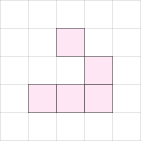

In [7]:
%%tikz -as=t
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

Alternatively, you can use the aliases:

- `-i` (or `--implicit-pic`) for `-as=tikzpicture`
- `-f` (or `--full-document`) for `-as=full-document`

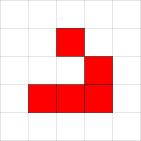

In [8]:
%%tikz -f
\documentclass[tikz]{standalone}
\begin{document}
    \begin{tikzpicture}
        \draw[help lines] grid (5, 5);
        \draw[fill=red] (1, 1) rectangle (2, 2);
        \draw[fill=red] (2, 1) rectangle (3, 2);
        \draw[fill=red] (3, 1) rectangle (4, 2);
        \draw[fill=red] (3, 2) rectangle (4, 3);
        \draw[fill=red] (2, 3) rectangle (3, 4);
    \end{tikzpicture}
\end{document}

## Using preamble

You can set a preamble by using the flag `-p="$<name_of_preamble>"` (or `--preamble="$<name_of_preamble>"`). The preamble includes all LaTeX code before `\begin{document}`, except for the `documentclass` line.

Adding a preamble defining a custom color:

In [9]:
preamble = r"""
\usepackage{tikz}
\usepackage{xcolor}
\definecolor{my_color}{RGB}{0, 238, 255}
"""

Reuse the preamble in a standalone TeX document:

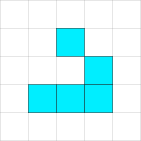

In [10]:
%%tikz -p "$preamble"
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=my_color] (1, 1) rectangle (2, 2);
    \draw[fill=my_color] (2, 1) rectangle (3, 2);
    \draw[fill=my_color] (3, 1) rectangle (4, 2);
    \draw[fill=my_color] (3, 2) rectangle (4, 3);
    \draw[fill=my_color] (2, 3) rectangle (3, 4);
\end{tikzpicture}

This also works with an implicit `tikzpicture` environment:

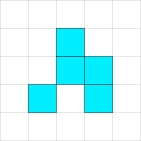

In [11]:
%%tikz -p "$preamble" -as=t
\draw[help lines] grid (5, 5);
\draw[fill=my_color] (1, 1) rectangle (2, 2);
\draw[fill=my_color] (3, 1) rectangle (4, 2);
\draw[fill=my_color] (2, 2) rectangle (3, 3);
\draw[fill=my_color] (3, 2) rectangle (4, 3);
\draw[fill=my_color] (2, 3) rectangle (3, 4);

## Loading packages and libraries

If you are not using the `-f` (or `--full-document`) flag, it's often useful to:

- Set the `\usepackage{X,Y,Z}` via `--t=<X,Y,Z>` (or `--tex-packages=<X,Y,Z>`)
- Set the `\usetikzlibrary{X,Y,Z}` via `--l=<X,Y,Z>` (or `--tikz-libraries=<X,Y,Z>`)
- Set the `\usepgfplotslibrary{X,Y,Z}` via `-lp=<X,Y,Z>` (or `--pgfplots-libraries=<X,Y,Z>`)

> **Note:** The `tikz` package is imported automatically.

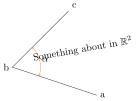

In [12]:
%%tikz -as=t -l=quotes,angles -t=amsfonts
% Example from Paul Gaborit
% http://www.texample.net/tikz/examples/angles-quotes/
\draw
    (3,-1) coordinate (a) node[right] {a}
    -- (0,0) coordinate (b) node[left] {b}
    -- (2,2) coordinate (c) node[above right] {c}
    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
    {angle=a--b--c};
    
\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};

If you don't want to import the `tikz` package, you can use the flag `-nt` (or `--no-tikz`):

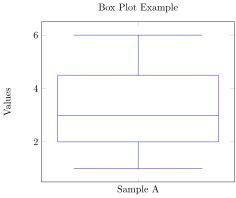

In [13]:
%%tikz -as=t -nt -t=pgfplots --pgfplots-libraries=statistics
\begin{axis}[
    title={Box Plot Example},
    boxplot/draw direction=y,
    ylabel={Values},
    xtick={1,2,3},
    xticklabels={Sample A, Sample B, Sample C},
]
% Sample A
\addplot+[
    boxplot prepared={
        median=3,
        upper quartile=4.5,
        lower quartile=2,
        upper whisker=6,
        lower whisker=1,
    },
] coordinates {};
\end{axis}

## Scaling the output

You can scale the Tikz image using the `-sc` (or `--scale`) parameter:
> **Note**: It uses `\boxscale` from the `graphicx` package

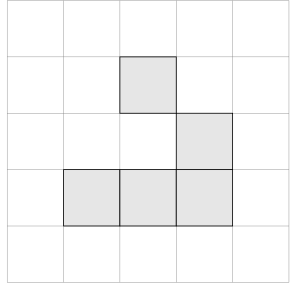

In [14]:
%%tikz -as=t -sc=2
\draw[help lines] grid (5, 5);
\draw[fill=black!10] (1, 1) rectangle (2, 2);
\draw[fill=black!10] (2, 1) rectangle (3, 2);
\draw[fill=black!10] (3, 1) rectangle (4, 2);
\draw[fill=black!10] (3, 2) rectangle (4, 3);
\draw[fill=black!10] (2, 3) rectangle (3, 4);

Which also works with standalone documents:
> **Note**: Not applicable with the `-f` (or `--full-document`) parameter

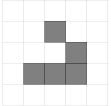

In [15]:
%%tikz -sc=0.75
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
    \draw[fill=black!50] (3, 1) rectangle (4, 2);
    \draw[fill=black!50] (3, 2) rectangle (4, 3);
    \draw[fill=black!50] (2, 3) rectangle (3, 4);
\end{tikzpicture}

## Rasterize the output

You can display the output as a rasterized (`png`) image by setting the `-r` (or `--rasterize`) parameter.

It is also possible to set the resolution (dots per inch) by using `-d=<dpi_of_image>` (or `--dpi=<dpi_of_image>`):

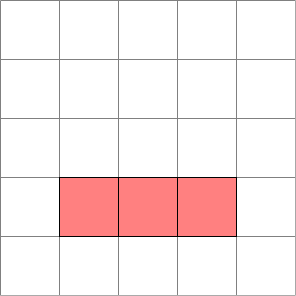

In [16]:
%%tikz -r --dpi=150
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=red!50] (1, 1) rectangle (2, 2);
    \draw[fill=red!50] (2, 1) rectangle (3, 2);
    \draw[fill=red!50] (3, 1) rectangle (4, 2);
\end{tikzpicture}

When using a rasterized image, you can use the `-g` (or `--gray`) option to apply grayscale to the image. This is useful for previewing how printed versions will appear:

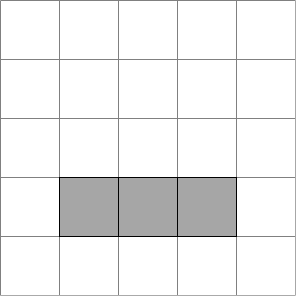

In [17]:
%%tikz -r --dpi=150 -g
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=red!50] (1, 1) rectangle (2, 2);
    \draw[fill=red!50] (2, 1) rectangle (3, 2);
    \draw[fill=red!50] (3, 1) rectangle (4, 2);
\end{tikzpicture}

## Save

You can save the image output by setting `-S=<name_of_image>` (or `--save-image=<name_of_image>`):

> **Note:** The magic automatically detects the output format. Including the file extension (`.png` or `.svg`) is optional.

Saving an `svg` file:

> **Note:** You can specify folders by using the `-S` parameter (e.g., `-S=outputs/file_name` saves to `./outputs/conway.svg`).

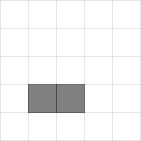

In [18]:
%%tikz --save-image=outputs/conway
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

Saving a `png` file:

> **Note:** Use the `-r` or `--rasterize` argument.

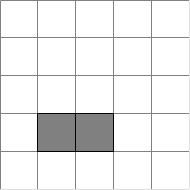

In [19]:
%%tikz --save-image=outputs/conway.png --rasterize
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!50] (1, 1) rectangle (2, 2);
    \draw[fill=black!50] (2, 1) rectangle (3, 2);
\end{tikzpicture}

You can save TikZ output by using `-s=<tikz_file.tikz>` (or `--save-tikz=<tikz_file.tikz>`):

> **Note:** This command saves the cell content to a file.

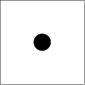

In [20]:
%%tikz --save-image=outputs/a_dot -s=outputs/a_dot.tikz
\begin{tikzpicture}[scale=3]
    \draw (0,0) rectangle (1,1);
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

If you want to save the full LaTeX code for use in an external IDE (e.g., TeXstudio), you can use `-st=<tex_file>` (or `--save-tex=<tex_file.tex>`):

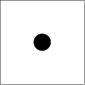

In [21]:
%%tikz -st=outputs/a_dot.tex
\begin{tikzpicture}[scale=3]
    \draw (0,0) rectangle (1,1);
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

You can even save PDF files using the flag `-sp=<pdf_name.pdf>` or `--save-pdf=<pdf_name.pdf>`:

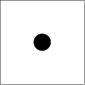

In [22]:
%%tikz -sp=outputs/a_dot.pdf
\begin{tikzpicture}[scale=3]
    \draw (0,0) rectangle (1,1);
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

To make it easier, set the `JUPYTER_TIKZ_SAVEDIR` environment to always save files in a custom folder:

In [23]:
import os

current_dir = os.getcwd()
os.environ["JUPYTER_TIKZ_SAVEDIR"] = os.path.join(current_dir, "outputs")

Now, render the `tikzpicture` and save the output:

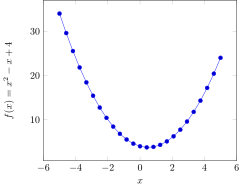

In [24]:
%%tikz -S=quadratic -s=quadratic.tikz -as=t -t=pgfplots -nt
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

In [25]:
del os.environ["JUPYTER_TIKZ_SAVEDIR"]

## Input from other files

You can load figures from a file using the LaTeX command `\input`.

First, we are going to create a file named `grid.tikz`:

In [26]:
%%writefile grid.tikz
\draw [style=help lines, step=2]        (-1,-1) grid    (+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]  (+2,+2) rectangle (+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]  (0,0) circle (.1);
\filldraw [color=gray]  (0,2) circle (.1);
\filldraw [color=gray]  (0,4) circle (.1);
\filldraw [color=gray]  (0,6) circle (.1);
\filldraw [color=gray]  (2,0) circle (.1);
\filldraw [color=black] (2,2) circle (.1);
\filldraw [color=black] (2,4) circle (.1);
\filldraw [color=gray]  (2,6) circle (.1);
\filldraw [color=gray]  (4,0) circle (.1);
\filldraw [color=black] (4,2) circle (.1);
\filldraw [color=black] (4,4) circle (.1);
\filldraw [color=gray]  (4,6) circle (.1);
\filldraw [color=gray]  (6,0) circle (.1);
\filldraw [color=gray]  (6,2) circle (.1);
\filldraw [color=gray]  (6,4) circle (.1);
\filldraw [color=gray]  (6,6) circle (.1);

Overwriting grid.tikz


Then, load it using the `\input` command:

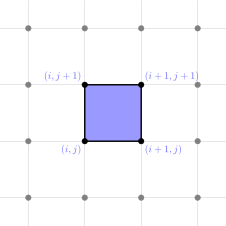

In [27]:
%%tikz -as=t
\input{grid.tikz}

You can import external data using PGFPlots `table {...}`:

In [28]:
# import pandas as pd
# import numpy as np

# t = np.linspace(0,1)
# x = np.sin(2*np.pi*t)+0.1*np.random.rand(*t.shape)

# df = pd.DataFrame(dict(x=x), t).rename_axis(index='t')
# display(df.head(5))
# df.to_csv('data.tsv', sep=" ")

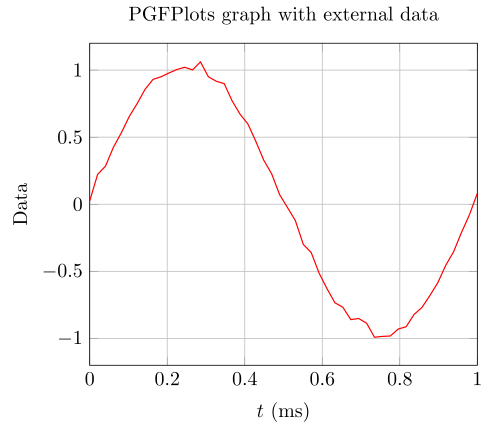

In [29]:
%%tikz -t=pgfplots -sc=2
\begin{tikzpicture}
    \begin{axis}[
        xlabel={$t$ (ms)},
        ylabel={Data},
        xmin=0, 
        xmax=1,
        ymin=-1.2, 
        ymax=1.2,
        xmajorgrids,
        ymajorgrids,
        title={PGFPlots graph with external data}
    ]
    \addplot [semithick, red] table {data.tsv};  % External data.tsv 
    \end{axis}
\end{tikzpicture}

## Using IPython strings

Sometimes, you may want to generate a TikZ document from a string, rather than from cell content. You can do this using line magic.

In [30]:
conway_str = r"""\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw[help lines] grid (5, 5);
\draw[fill=magenta] (1, 1) rectangle (2, 2);
\draw[fill=magenta] (2, 1) rectangle (3, 2);
\draw[fill=magenta] (3, 1) rectangle (4, 2);
\draw[fill=magenta] (3, 2) rectangle (4, 3);
\draw[fill=magenta] (2, 3) rectangle (3, 4);
\end{tikzpicture}
\end{document}"""

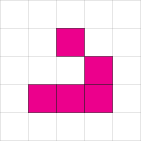

In [31]:
%tikz --input-type=f -S=cornway_image -s=cornway_code.tex conway_str

## Jinja templates

To help ensure that TikZ pictures stay aligned with your data, you can use [Jinja2 templates](http://jinja.pocoo.org/docs/latest/templates/).

> **Note:**
> Before using it, you must install Jinja2:
> 
> ```shell
> pip install jinja2
> ```

First, we need to populate some data:

In [32]:
node_names = "ABCDEF"
nodes = {s: int(365 / len(node_names) * i) for i, s in enumerate(node_names)}
n = len(nodes)
nodes

{'A': 0, 'B': 60, 'C': 121, 'D': 182, 'E': 243, 'F': 304}

Then, you can interpret the cell source as a Jinja2 template using the `-j` (or `--use-jinja`) parameter:

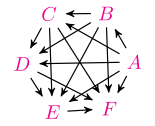

In [33]:
%%tikz -j -l=arrows,automata -sc=2
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=magenta] (v{{ loop.index0 }}) at ({{ angle }}:1) {${{ name }}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}
\end{tikzpicture}

It also works for full documents and implicit pictures:

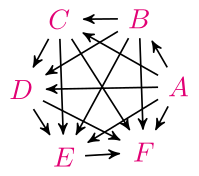

In [34]:
%%tikz --use-jinja -as=f -r -d=200
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}
\end{tikzpicture}
\end{document}

Sometimes, you'll make mistakes. Debugging transpiled code is challenging, especially without a mapping.

To assist, you can print the Jinja template using `-pj` (or `--print-jinja`):

> **Note:** The saved code file is also the interpolated code source.

\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  \node[color=magenta] (v0) at (0:1) {$A$};
  \node[color=magenta] (v1) at (60:1) {$B$};
  \node[color=magenta] (v2) at (121:1) {$C$};
  \node[color=magenta] (v3) at (182:1) {$D$};
  \node[color=magenta] (v4) at (243:1) {$E$};
  \node[color=magenta] (v5) at (304:1) {$F$};
  \path (v0) edge (v1);
         \path (v0) edge (v2);
         \path (v0) edge (v3);
         \path (v0) edge (v4);
         \path (v0) edge (v5);
         \path (v1) edge (v2);
         \path (v1) edge (v3);
         \path (v1) edge (v4);
         \path (v1) edge (v5);
         \path (v2) edge (v3);
         \path (v2) edge (v4);
         \path (v2) edge (v5);
         \path (v3) edge (v4);
         \path (v3) edge (v5);
         \path (v4) edge (v5);
         \end{tikzpicture}


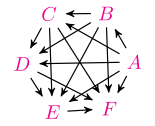

In [35]:
%%tikz -pj -l=arrows,automata -sc=2 --save-tex=outputs/jinja_rendered.tex
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=magenta] (v{{ loop.index0 }}) at ({{ angle }}:1) {${{ name }}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

## Exporting code to variables

With the flag `-sv=<name_of_the_variable>`, it is possible to save the code to an IPython string variable.

> **Note:** The code used to save to the variable is the same as that used by the `-s` flag.

In this example, we are going to save the code in the variable `my_frame`:

In [36]:
%%tikz -as=t -sv=my_frame
\draw (0,0) rectangle (1,1);

Now, we can reuse the variable in the code with Jinja:

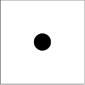

In [37]:
%%tikz -as=t --use-jinja
\begin{tikzpicture}[scale=3]
    {{ my_frame }} % This is my_frame that I rendered before
    \filldraw (0.5,0.5) circle (.1);
\end{tikzpicture}

You can also combine `-sv` with `-j`:

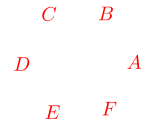

In [38]:
%%tikz -as=t -j -sv=node_names -sc=2
{% for name, angle in nodes.items() -%}
   \node[color=red] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
{% endfor -%}

In [39]:
node_names

'\\node[color=red] (v0) at (0:1) {$A$};\n\\node[color=red] (v1) at (60:1) {$B$};\n\\node[color=red] (v2) at (121:1) {$C$};\n\\node[color=red] (v3) at (182:1) {$D$};\n\\node[color=red] (v4) at (243:1) {$E$};\n\\node[color=red] (v5) at (304:1) {$F$};\n'

Now, incorporate it into another `tikzpicture`:

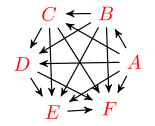

In [40]:
%%tikz --use-jinja -l=arrows,automata -sc=2
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm, semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {{ node_names }}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

Finally, you can define a preamble using the `-sv` flag. Note that, because it is a preamble, you must avoid compiling it by using the option `-nc` (or `--no-compile`):

In [41]:
%%tikz -sv=my_preamble --no-compile
\usepackage{tikz}
\usepackage{xcolor}
\definecolor{mymagenta}{RGB}{226,0,116}

Reusing the preamble in the figure:

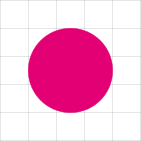

In [42]:
%%tikz -p "$my_preamble"
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
     \filldraw [color=mymagenta] (2.5,2.5) circle (1.5);
\end{tikzpicture}

## TeX Program

You can change the TeX program using `-tp=<tex_program>` or `--tex-program=<tex_program>`:

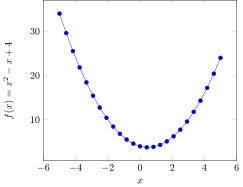

In [43]:
%%tikz -as=tikz -t=pgfplots -nt -tp=lualatex
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x + 4$}
]
\addplot {x^2 - x + 4};
\end{axis}

You can also pass custom parameters to the TeX program:

In [44]:
tex_params = "--enable-write18 --extra-mem-top=10000000"

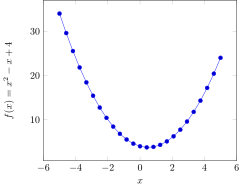

In [45]:
%%tikz -as=tikz -t=pgfplots -nt -tp=pdflatex --tex-args="$tex_params"
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

## Logging and debugging

If you write invalid TikZ code, it will display the LaTeX command line error message:

> **Note:** Since LaTeX command line error messages tend to be verbose, by default, only the tail (last 20 lines) is shown.

In [46]:
%%tikz -as=t
% Error: Forgot Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

ase.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/00miktex\epstopdf-sys.c
fg))

! Package tikz Error: Giving up on this path. Did you forget a semicolon?.

See the tikz package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.7     \end{tikzpicture}
                         
? 
! Emergency stop.
 ...                                              
                                                  
l.7     \end{tikzpicture}
                         
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on 9472da455f2215f.log.


If you want to see the entire error message, you can use the `-e` (or `--full-error`) parameter:

In [47]:
%%tikz -as=t -e
% Error: Comma after the first coordinate
\draw[fill=black] (1, 1) rectangle (2, 2)

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=pdflatex.fmt)
 restricted \write18 enabled.
entering extended mode
(C:/Users/lucas/Github/jupyter-tikz/notebooks/3a8902084454bc1.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-05-27>

(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
ls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/tools\shellesc.sty)
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifluatex.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/latex/xkeyval\xkeyval.sty
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkeyval.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkvutils.tex
(C:\Users\lucas\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\keyval.tex)))
)
(C:

If you want to print the entire LaTeX string for any reason, you can use the `-pt` (or `--print-tex`) option:

\documentclass{standalone}
\usepackage{graphicx}
\usepackage{tikz}
\begin{document}
    \scalebox{2.0}{
    \begin{tikzpicture}
        \draw[help lines] grid (5, 5);
        \draw[fill=black!10] (1, 1) rectangle (2, 2);
        \draw[fill=black!10] (2, 1) rectangle (3, 2);
        \draw[fill=black!10] (3, 1) rectangle (4, 2);
        \draw[fill=black!10] (3, 2) rectangle (4, 3);
        \draw[fill=black!10] (2, 3) rectangle (3, 4);
    \end{tikzpicture}
    }
\end{document}


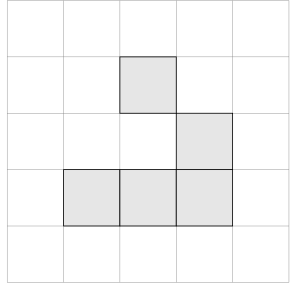

In [48]:
%%tikz -as=t -sc=2 --print-tex
\draw[help lines] grid (5, 5);
\draw[fill=black!10] (1, 1) rectangle (2, 2);
\draw[fill=black!10] (2, 1) rectangle (3, 2);
\draw[fill=black!10] (3, 1) rectangle (4, 2);
\draw[fill=black!10] (3, 2) rectangle (4, 3);
\draw[fill=black!10] (2, 3) rectangle (3, 4);

Finally, you can keep the temporary files (LaTeX, PDF and image) for further investigation by using `-k` (or `--keep`). The file names are hex representation of hash of the full LaTeX code.

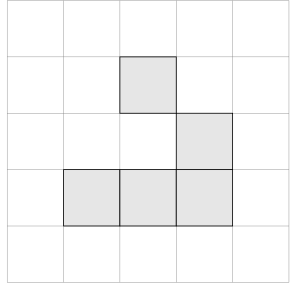

In [49]:
%%tikz -as=t -sc=2 -k
\draw[help lines] grid (5, 5);
\draw[fill=black!10] (1, 1) rectangle (2, 2);
\draw[fill=black!10] (2, 1) rectangle (3, 2);
\draw[fill=black!10] (3, 1) rectangle (4, 2);
\draw[fill=black!10] (3, 2) rectangle (4, 3);
\draw[fill=black!10] (2, 3) rectangle (3, 4);

# Usage as a Package

It is also possible to use Jupyter TikZ as a package. You can create TikZ pictures using two available classes:

- `TexDocument(code, **options)`: Uses a full LaTeX document as code input (same effect as `-as=full-document`).
- `TexFragment(code, **options)`: Uses part of a LaTeX document as code input to create a standalone LaTeX document (same effect as `-as=standalone-document` or `-as=tikzpicture`).

First, let's import the classes from the package:

In [50]:
from jupyter_tikz import TexDocument, TexFragment

## Basic usage of TexDocument

Available methods are:
- `run_latex(**options)`: Runs LaTeX and displays the output in a cell.
- `save(dest, **options)`: Saves the `code` or `image` output to a file. The default is `code`.

Let's start with a basic example. First, define the code:

In [51]:
code = r"""\documentclass{standalone}
\usepackage{graphicx}
\usepackage{tikz}
\usepackage{amsfonts}
\usetikzlibrary{quotes,angles}
\begin{document}
	\scalebox{2}{
	\begin{tikzpicture}
		% Example from Paul Gaborit
		% http://www.texample.net/tikz/examples/angles-quotes/
		\draw
		    (3,-1) coordinate (a) node[right] {a}
		    -- (0,0) coordinate (b) node[left] {b}
		    -- (2,2) coordinate (c) node[above right] {c}
		    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
		    {angle=a--b--c};
    
		\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};
	\end{tikzpicture}
	}
\end{document}"""

Then, create the object:

In [52]:
tex_document = TexDocument(code)
print(tex_document)

\documentclass{standalone}
\usepackage{graphicx}
\usepackage{tikz}
\usepackage{amsfonts}
\usetikzlibrary{quotes,angles}
\begin{document}
	\scalebox{2}{
	\begin{tikzpicture}
		% Example from Paul Gaborit
		% http://www.texample.net/tikz/examples/angles-quotes/
		\draw
		    (3,-1) coordinate (a) node[right] {a}
		    -- (0,0) coordinate (b) node[left] {b}
		    -- (2,2) coordinate (c) node[above right] {c}
		    pic["$\alpha$", draw=orange, <->, angle eccentricity=1.2, angle radius=1cm]
		    {angle=a--b--c};
    
		\node[rotate=10] (r) at (2.5, 0.65) {Something about in $\mathbb{R}^2$};
	\end{tikzpicture}
	}
\end{document}


Finally, run LaTeX and display the output:

> **Note:** You can configure the output by passing options to `run_latex`. In this example, `save_image` was used.

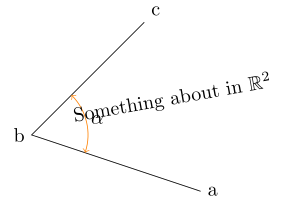

In [53]:
tex_document.run_latex(save_image="outputs/angle")

And save the code to a file:

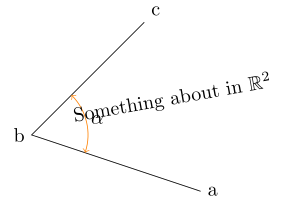

In [54]:
tex_document.run_latex(save_tex="outputs/angle", save_tikz="outputs/angle", save_pdf="outputs/angle")

## Working with Jinja

In [55]:
jinja_code = r"""\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}
\end{tikzpicture}
\end{document}"""

You can render Jinja by passing the `use-jinja` option:

> **Note:** If you are using Jinja, you must pass the `ns=<namespace>` parameter in order to allow the method to access the variables:

In [56]:
tex_jinja_document = TexDocument(jinja_code, use_jinja=True, ns=locals())
print(tex_jinja_document)  # It prints the rendered Jinja Code

\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  \node[color=mymagenta] (v0) at (0:1) {$A$};
  \node[color=mymagenta] (v1) at (60:1) {$B$};
  \node[color=mymagenta] (v2) at (121:1) {$C$};
  \node[color=mymagenta] (v3) at (182:1) {$D$};
  \node[color=mymagenta] (v4) at (243:1) {$E$};
  \node[color=mymagenta] (v5) at (304:1) {$F$};
  \path (v0) edge (v1);
         \path (v0) edge (v2);
         \path (v0) edge (v3);
         \path (v0) edge (v4);
         \path (v0) edge (v5);
         \path (v1) edge (v2);
         \path (v1) edge (v3);
         \path (v1) edge (v4);
         \path (v1) edge (v5);
         \path (v2) edge (v3);
         \path (v2) edge (v4);
         \path (v2) edge (v5);
         \path (v3) edge (v4);
         \path (v3) edge

Finally, run LaTeX and show the output:

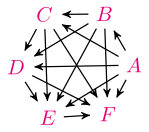

In [57]:
tex_jinja_document.run_latex(rasterize=True, dpi=150)

## Basic usage TexFragment

If you want to use parts of LaTeX, you can use the `TexFragment` class.

> **Note:** `TexFragment` is a subclass of `TexDocument`, which means that all methods available in `TexDocument` are also available in `TexFragment`.

Now follows a basic example:

In [58]:
# The code
tex_template_code = r"""\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}"""

In [59]:
# The object
tikz_picture = TexFragment(
    tex_template_code,
    implicit_tikzpicture=True, # If true wraps the template within a tikzpicture
    scale=1.5,
    tex_packages="pgfplots",
    no_tikz=True
)

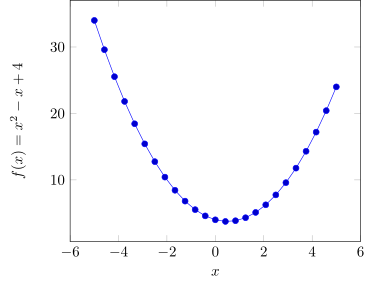

In [60]:
# Run LaTeX
tikz_picture.run_latex()

# Additional Examples

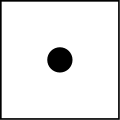

In [61]:
%%tikz -as=tikzpicture --rasterize --dpi=300 -l=arrows,automata
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

In [62]:
from jupyter_tikz import TexFragment

tikz_code = tex_template_code = r"""\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
     \filldraw [color=orange, opacity=0.3] (2.5,2.5) circle (1.5);
\end{tikzpicture}"""

tikz = TexFragment(tikz_code)

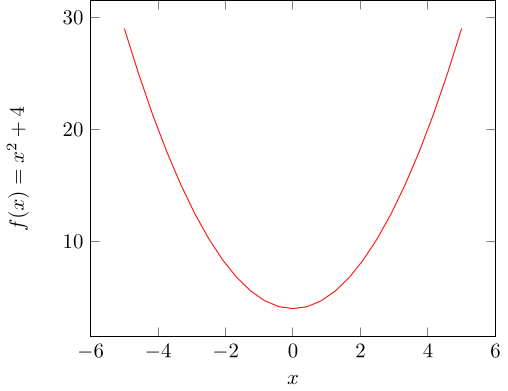

In [63]:
%%tikz -i -t=pgfplots -nt -r --dpi=150
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 + 4$}
]
\addplot [red] {x^2 + 4};
\end{axis}

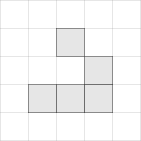

In [64]:
%%tikz
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!10] (1, 1) rectangle (2, 2);
    \draw[fill=black!10] (2, 1) rectangle (3, 2);
    \draw[fill=black!10] (3, 1) rectangle (4, 2);
    \draw[fill=black!10] (3, 2) rectangle (4, 3);
    \draw[fill=black!10] (2, 3) rectangle (3, 4);
\end{tikzpicture}

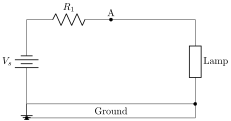

In [65]:
%%tikz -t=circuitikz --no-tikz
\begin{circuitikz}[american voltages]
    % Drawing a simple electric circuit with a battery, resistor, and a lamp.
    
    % Battery
    \draw (0,0) to[battery, l=$V_s$] (0,3);
    
    % Resistor
    \draw (0,3) to[resistor, l=$R_1$, -*] (3,3) node[above] {A};
    
    % Lamp (represented as a generic load here)
    \draw (3,3) -- (6,3) to[generic, l=Lamp, -*] (6,0);
    
    % Ground connection
    \draw (0,0) -- (6,0);
    
    % Connecting wire back to the battery
    \draw (6,0) -- (6,-0.5) to[short, -*] (0,-0.5) -- (0,0);
    
    % Adding a ground symbol for clarity
    \draw (0,0) node[ground]{};
    
    % Labeling the ground
    \draw (3,0) node[below] {Ground};
\end{circuitikz}